# Classification with PyCaret


## Imports and dataset loading

In [1]:
import gc
gc.collect()

269

In [2]:
import pandas as pd
#from pycaret.regression import *
from pycaret.classification import * 
import shap
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot

In [3]:
df = pd.read_excel("C:/Users/KAPLAN/Desktop/masterthesis_fulldata_interpolated_ready.xlsx", engine='openpyxl')
df.head()

,Date,Daily_Sum_CrudeBERT,Label_CrudeBERT,Cuml_CurdeBERT,Daily_Sum_CrudeBERTv2,Label_CrudeBERTv2,Cuml_CrudeBERTv2,Daily_Sum_CrudeBERTv2_GT,Label_CrudeBERTv2_GT,Cuml_CrudeBERTv2_GT,Daily_Sum_CrudeBERT_T4,Label_CrudeBERT_T4,Cuml_CrudeBERT_T4,Daily_Sum_FinBERT,Label_FinBERT,Cuml_FinBERT,Daily_Sum_RavenPack,Label_RavenPack,Cuml_RavenPack,Price_t0,Return_t0,Label_Price_t0,Price_t1,Return_t1,Label_Price_t1,Price_t2,Return_t2,Label_Price_t2,Price_t3,Return_t3,Label_Price_t3,Google_Trend_K_S_Crude_Oil
0,2000-01-01,0.966632,1,0.966632,0.973280,1,0.973280,0.973280,1,0.973280,0.984229,1,0.984229,-0.500000,-1,-0.500000,0.000000,0,0.000000,25.220675,-0.000391,-1,25.726691,-0.000391,-1,25.879467,-0.000391,-1,25.550000,-0.000391,-1,1.0
1,2000-01-02,0.882076,1,1.848708,0.943123,1,1.916403,0.943123,1,1.916403,0.897107,1,1.881336,0.170280,1,-0.329720,1.882897,1,1.882897,25.726691,0.020064,1,25.879467,0.005938,1,25.550000,-0.012731,-1,24.910000,-0.025049,-1,1.0
2,2000-01-03,0.965947,1,2.814655,0.976359,1,2.892762,0.976359,1,2.892762,0.914524,1,2.795860,0.500000,1,0.170280,1.000000,1,2.882897,25.879467,0.005938,1,25.550000,-0.012731,-1,24.910000,-0.025049,-1,24.780000,-0.005219,-1,1.0
3,2000-01-04,0.983290,1,3.797944,0.956645,1,3.849407,0.956645,1,3.849407,0.916208,1,3.712069,0.500000,1,0.670280,-2.000000,-1,0.882897,25.550000,-0.012731,-1,24.910000,-0.025049,-1,24.780000,-0.005219,-1,24.220000,-0.022599,-1,1.0
4,2000-01-05,-0.475622,-1,3.322323,0.185926,1,4.035333,0.185926,1,4.035333,0.180531,1,3.892599,0.235313,1,0.905593,-3.224957,-1,-2.342060,24.910000,-0.025049,-1,24.780000,-0.005219,-1,24.220000,-0.022599,-1,23.900329,-0.013199,-1,1.0


<br><br>

## Data cleaning

In [4]:
list(df.columns.values)
list(df)

['Date',
 'Daily_Sum_CrudeBERT',
 'Label_CrudeBERT',
 'Cuml_CurdeBERT',
 'Daily_Sum_CrudeBERTv2',
 'Label_CrudeBERTv2',
 'Cuml_CrudeBERTv2',
 'Daily_Sum_CrudeBERTv2_GT',
 'Label_CrudeBERTv2_GT',
 'Cuml_CrudeBERTv2_GT',
 'Daily_Sum_CrudeBERT_T4',
 'Label_CrudeBERT_T4',
 'Cuml_CrudeBERT_T4',
 'Daily_Sum_FinBERT',
 'Label_FinBERT',
 'Cuml_FinBERT',
 'Daily_Sum_RavenPack',
 'Label_RavenPack',
 'Cuml_RavenPack',
 'Price_t0',
 'Return_t0',
 'Label_Price_t0',
 'Price_t1',
 'Return_t1',
 'Label_Price_t1',
 'Price_t2',
 'Return_t2',
 'Label_Price_t2',
 'Price_t3',
 'Return_t3',
 'Label_Price_t3',
 'Google_Trend_K_S_Crude_Oil']

In [5]:
Sentiment = 'Label_CrudeBERTv2'
Price = 'Label_Price_t0'
data = df[[Sentiment, Price]]
data.tail(20)

,Label_CrudeBERTv2,Label_Price_t0
7742,-1,-1
7743,1,1
7744,-1,-1
7745,1,-1
7746,-1,-1
7747,-1,-1
7748,1,1
7749,1,1
7750,1,1
7751,-1,-1


### Optional: transform it to binary labels (only pos and neg without neutral)

In [6]:
neutral_mapper = {0: 1}
data[Sentiment].replace(neutral_mapper, inplace=True)
data[Price].replace(neutral_mapper, inplace=True)

In [7]:
clf = setup(data, target=Price, session_id=42)

,Description,Value
0,session_id,42
1,Target,Label_Price_t0
2,Target Type,Binary
3,Label Encoded,"-1: 0, 1: 1"
4,Original Data,"(7762, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.1890
nb,Naive Bayes,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.1490
dt,Decision Tree Classifier,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.1240
svm,SVM - Linear Kernel,0.5454,0.0000,0.5580,0.5611,0.5592,0.0898,0.0899,0.0040
ridge,Ridge Classifier,0.5454,0.0000,0.5580,0.5611,0.5592,0.0898,0.0899,0.0030
rf,Random Forest Classifier,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.0260
qda,Quadratic Discriminant Analysis,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.0030
ada,Ada Boost Classifier,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.0110
gbc,Gradient Boosting Classifier,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.0090
lda,Linear Discriminant Analysis,0.5454,0.5449,0.5580,0.5611,0.5592,0.0898,0.0899,0.0030


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5404,0.5404,0.5409,0.5568,0.5487,0.0808,0.0808
1,0.5074,0.5072,0.5106,0.5255,0.5180,0.0144,0.0144
2,0.5404,0.5410,0.5248,0.5606,0.5421,0.0819,0.0821
3,0.5396,0.5375,0.5979,0.5508,0.5734,0.0752,0.0755
4,0.5562,0.5553,0.5801,0.5699,0.5750,0.1107,0.1107
5,0.5451,0.5442,0.5694,0.5594,0.5644,0.0885,0.0886
6,0.5304,0.5312,0.5089,0.5500,0.5287,0.0622,0.0623
7,0.5543,0.5542,0.5587,0.5709,0.5647,0.1083,0.1083
8,0.5875,0.5870,0.6014,0.6014,0.6014,0.1739,0.1739
9,0.5525,0.5512,0.5872,0.5651,0.5759,0.1026,0.1027


<br><br>

## Model visualization and interpretation

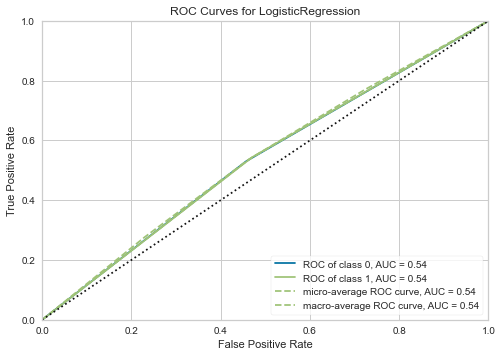

In [10]:
plot_model(model)

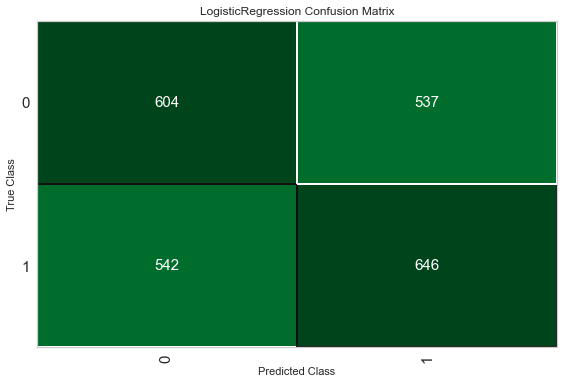

In [16]:
plot_model(model, 'confusion_matrix')


<br><br>

## Predictions and model saving

In [14]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5036,0.5018,1.0000,0.5036,0.6699,0.0000,0.0000


In [15]:
finalize_model(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
save_model(model, 'titanic_lgbm')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Label_Price_t1',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
       